### Faces of crimes over years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
%run load_data.py

In [4]:
# take a copy of the raw training set
year_based = raw_train

In [5]:
year_based.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [6]:
year_based['Dates'] = pd.to_datetime(year_based['Dates'])

In [7]:
year_based.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

In [8]:
year_based.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [9]:
# Create a column with only Year
year_based['Year'] = year_based['Dates'].map(lambda x: x.year)

In [10]:
cat_year_group = year_based.groupby(['Category', 'Year'])
cat_year_group_size = cat_year_group.size()

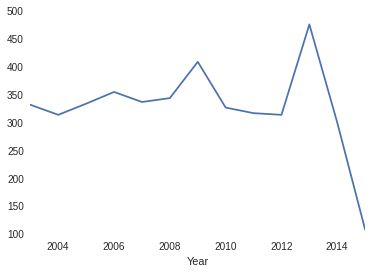

In [11]:
# number of cases of DRUNKENNESS over years
cat_year_group_size['DRUNKENNESS'].plot(kind='line')

([<matplotlib.axis.XTick at 0x7f9a653d3510>,
 <a list of 13 Text xticklabel objects>)

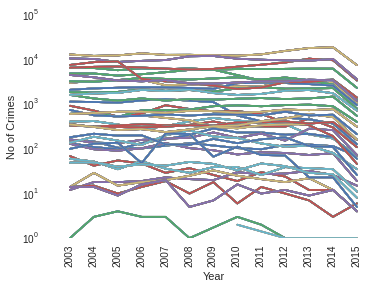

In [12]:
for key, group in cat_year_group:
    plt.plot(cat_year_group_size[key[0]].keys(), cat_year_group_size[key[0]])
plt.xlabel('Year')
plt.ylabel('No of Crimes')
plt.yscale('log')
plt.xticks(np.arange(min(cat_year_group_size['ASSAULT'].keys()), max(cat_year_group_size['ASSAULT'].keys())+1, 1.0), rotation='vertical')